Import the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(5)
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
# Shape of numpy arrays
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (60000, 28, 28)
y_train Shape: (60000,)
X_test Shape: (10000, 28, 28)
y_test Shape: (10000,)


60000 images

28 X 28 pixels

In [5]:
# Printing the particular image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


All the images in the dataset have same dimension 28 X 28.

orelse we have don't have same size, we will resize the images

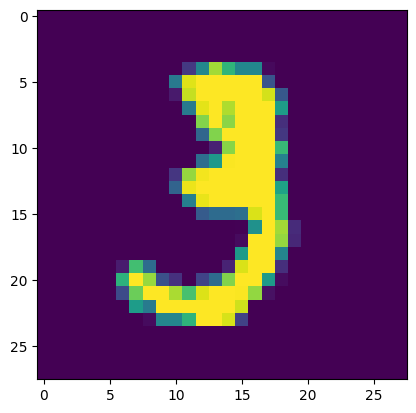

The corresponding label is: 3


In [7]:
# Displaying the image

plt.imshow(X_train[10])
plt.show()

# Print the corresponding label
print('The corresponding label is:', y_train[10])

Image Labels

In [8]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [9]:
# Unique Values in Y_train

print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [10]:
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


In [11]:
# Scaling the values by normalizing it.
# The values are from 0 to 255. we are goint to get in to 0 to 1. for better accuracy

X_train = X_train/255
X_test = X_test/255

In [12]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

** Building the Neural Network **

In [13]:
# Setting up the layers of the Neural Network

models = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Compiling the NN

models.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [15]:
# Training the NN

models.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8766 - loss: 0.4350
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9610 - loss: 0.1303
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9744 - loss: 0.0864
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9815 - loss: 0.0627
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9868 - loss: 0.0472
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9903 - loss: 0.0353
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9933 - loss: 0.0261
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9946 - loss: 0.0203
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9962 - loss: 0.0155
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9958 - loss: 0.0145


Training data accuracy is 99.58%

**Accuracy on test data**

In [16]:
loss, accuracy = models.evaluate(X_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9674 - loss: 0.1303
0.972000002861023


Test data accuracy is 97.20%

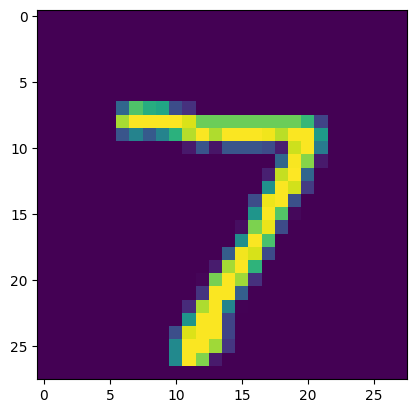

In [17]:
# First data point in test data

plt.imshow(X_test[0])
plt.show()

In [18]:
# Print the true label
print('The corresponding label is:', y_test[0])

The corresponding label is: 7


In [19]:
Y_pred = models.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
print(Y_pred.shape)

(10000, 10)


In [21]:
print(Y_pred[0])

[1.5574478e-05 3.2173437e-05 3.2577711e-01 8.6967498e-01 6.9003447e-09
 3.1073091e-06 2.2289924e-12 9.9999982e-01 5.6131912e-06 4.3475959e-02]


model.predict() - it was probability of getting the value.
as you can see. in the 7th place the probability is high.


In [22]:
# Converting the prediction probabilities to class labels

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [23]:
# Converting the prediction probabilities to class labels for all data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted values

**Confusion Matrix**

In [24]:
conf_mat = confusion_matrix(y_test, Y_pred_labels)

In [25]:
print(conf_mat)

tf.Tensor(
[[ 970    0    0    0    1    1    3    1    3    1]
 [   1 1115    6    2    0    1    2    5    3    0]
 [   3    1 1007    1    1    0    3    8    8    0]
 [   0    0    7  987    0    2    0    7    6    1]
 [   0    0    8    0  964    0    3    3    1    3]
 [   2    0    0   28    2  841    4    3    9    3]
 [   4    1    3    1    7    3  936    0    3    0]
 [   1    1    8    2    0    0    0 1013    1    2]
 [   0    0    5    7    4    0    2    8  945    3]
 [   1    4    0    3   25    1    2   26    5  942]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

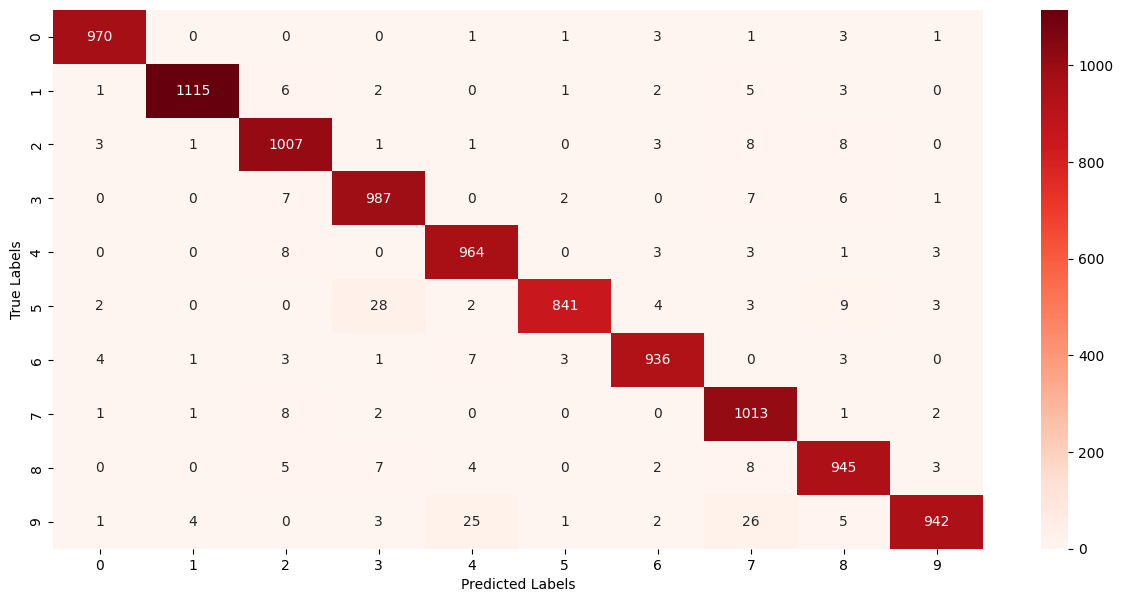

In [34]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building the Predicitive System

In [37]:
image_path = '/content/training-and-testing-with-mnist_8.webp'

input_image = cv2.imread(image_path)

In [38]:
type(input_image)

numpy.ndarray

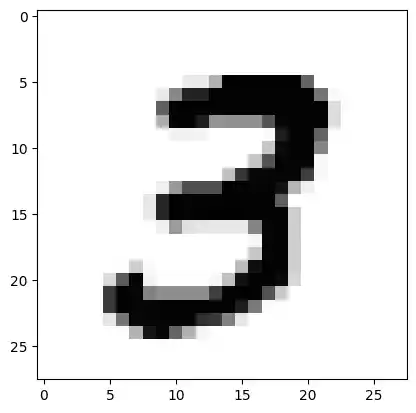

In [40]:
cv2_imshow(input_image)

In [39]:
print(input_image.shape)

(413, 416, 3)


In [41]:
# Its showing as rgb image.
# we have to convert it into greyscale and resize it

In [42]:
greyscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [43]:
greyscale.shape

(413, 416)

In [44]:
input_image_resize = cv2.resize(greyscale, (28,28))

In [46]:
input_image_resize.shape

(28, 28)

In [52]:
input_image_resize = input_image_resize/255

In [53]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [54]:
input_prediction = models.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[4.8291384e-09 0.0000000e+00 1.1609657e-04 1.4939329e-07 0.0000000e+00
  1.0000000e+00 9.9999952e-01 9.9751014e-01 4.3651635e-15 9.5750509e-19]]


In [55]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

5


Predictive system

Path of the image to be predicted: /content/5.webp


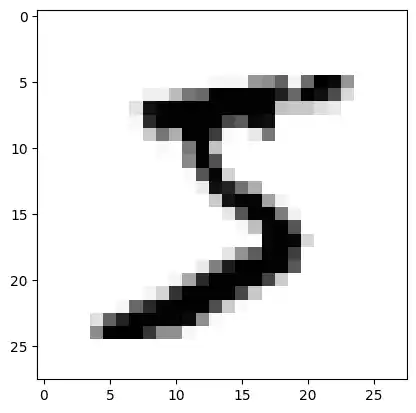

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The Handwritten Digit is recognised as 5


In [59]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

greyscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(greyscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = models.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as', input_pred_label)